In [2]:
import matplotlib.pyplot as plt
import numpy as np
from axes import phy_axes

%matplotlib inline
# retina display
plt.rcParams['figure.dpi'] = 100


In [3]:
N=9
n=1
# p is the list of integers from 0 to N+1
p = np.array((range(N+2)))
print(p)


[ 0  1  2  3  4  5  6  7  8  9 10]


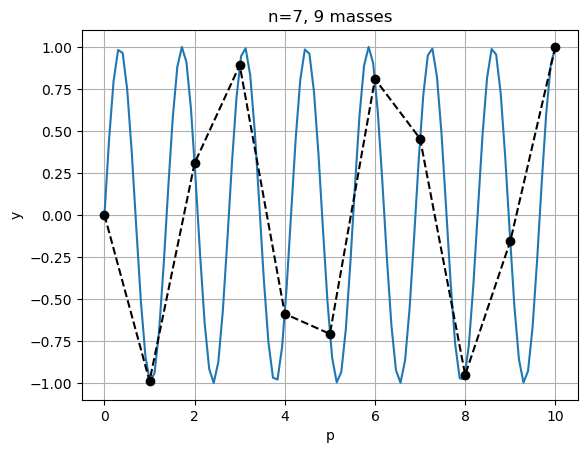

In [4]:
n=7
yvals = np.sin(p * np.pi/2 *(4*n+1)/(N+1))
pp = np.linspace(0,N+1,100)
yyvals = np.sin(pp * np.pi/2 *(4*n+1)/(N+1))
plt.plot(pp,yyvals)
plt.plot(p, yvals, 'ko--')
plt.grid()
plt.title(f'n={n}, {N} masses')
plt.xlabel('p')
plt.ylabel('y')
plt.show()
plt.savefig(f'a02_6_{n}.pdf')


In [5]:
import math
xvals = np.linspace(0,10, 500)
llambda = 2.5
k = 2*np.pi/llambda
plt.plot(xvals, np.sin(xvals*k+0.23), 'g-')
# draw a horizontal line from intersection of line at x=2 with length llambda
xpos=1.5
ystart = math.sin(xpos*k+.23)
print(ystart)
# draw an arrow from 1,1 to 2,2
plt.arrow(xpos, ystart, llambda,  0, head_width=0.1, head_length=0.1, fc='r', ec='r')
#plt.plot([2,2+llambda],[ystart,ystart], 'r-')

phy_axes()
plt.savefig(f'lec07_1.png')


-0.7567444385124189


In [8]:
xvals = np.linspace(0,10, 500)
yvals = []
yvals2 = []
yvals3 = []

llambda = 2.3
k = 2*math.pi/llambda
c = 0.08

def plotter(t: int) -> np.ndarray:
    yvals = 0.5*np.sin(k*(xvals - c * t))
    yvals2 = 0.5*np.sin(k*(xvals + c * t))
    yvals3 = (yvals + yvals2)
    line.set_data(xvals, yvals)
    line2.set_data(xvals, yvals2)
    line3.set_data(xvals, yvals3)
    return [line,line2, line3]

## Now make an animation

from matplotlib.animation import FuncAnimation 
   
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 10), 
                ylim =(-1, 1)) 
axis.set_aspect(1)  

# initializing a line variable
line, = axis.plot([], [], 'b-', lw = 1) 
line2, = axis.plot([], [], 'r-', lw=1)
line3, = axis.plot([], [], 'g-', lw=1)
phy_axes()

   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return [line, line2,line3]

   
anim = FuncAnimation(fig, plotter, init_func = init,
                     frames = 500, interval = 25, blit = True)
  
   
anim.save('test_anim.mp4', 
          writer = 'ffmpeg', fps = 24, dpi = 250)
